In [59]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = 99

In [28]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [29]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [46]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

Target col is most likely MPG because I've done this before and there was mention of it at the end of the last practice session. That being said, we could probably strip a shit-ton of theses columns, though if they want me to label each one, they're fucking crazy. 

In [34]:
numeric_cars.replace('?', np.nan, inplace=True)

In [47]:
numeric_cars[['normalized-losses','price']] = numeric_cars[['normalized-losses','price']].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [49]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [51]:
numeric_cars = numeric_cars.astype(float)

In [53]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [54]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [55]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [56]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [120]:
price_col = numeric_cars['price']
norm_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

norm_cars['price'] = price_col

In [121]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    cutrow = int(len(rand_df) /2)
    train = rand_df.iloc[:cutrow]
    test = rand_df.iloc[cutrow:] 
    
    knn = KNeighborsRegressor()
    knn.fit(train[[training_col]], train[[target_col]])
    predictions = knn.predict(test[[training_col]])
    rmse = np.sqrt(mean_squared_error(y_pred = predictions, y_true = test[target_col]))
    return rmse  
      
    

In [122]:
knn_train_test('normalized-losses', 'price', norm_cars)

7330.197653434445

In [123]:
KNN_cols = norm_cars.drop(columns = ['price']).columns.tolist()

In [124]:
KNN_cols

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [125]:
rmses =[]
for each in KNN_cols:
    rmses.append([each, knn_train_test(each, 'price', norm_cars)])

In [152]:
new_df = pd.DataFrame(rmses)
new_df = new_df.sort_values(1)



In [156]:
new_df[0].iloc[0:2].tolist()

['horsepower', 'curb-weight']

It appears to be horsepower.

In [128]:
def knn_train_test(training_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    cutrow = int(len(rand_df) /2)
    train = rand_df.iloc[:cutrow]
    test = rand_df.iloc[cutrow:] 
    
    k_vals = [1,3,5,7,9]
    k_stats = {}
    for k in k_vals:
        
        knn = KNeighborsRegressor(n_neighbors= k)
        knn.fit(train[[training_col]], train[[target_col]])
        predictions = knn.predict(test[[training_col]])
        rmse = np.sqrt(mean_squared_error(y_pred = predictions, y_true = test[target_col]))
        k_stats[k] = rmse
    return k_stats

train_cols = norm_cars.drop(columns=['price'])
k_train = {}
for col in train_cols:
    k_train[col] = knn_train_test(col, 'price', norm_cars)
     





      
    

In [129]:
k_train

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

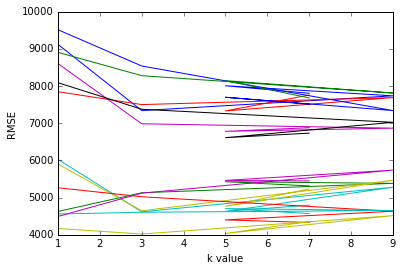

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_train.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [163]:
def knn_train_test(training_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    cutrow = int(len(rand_df) /2)
    train = rand_df.iloc[:cutrow]
    test = rand_df.iloc[cutrow:] 
    
    k_vals = [i for i in range(1,26)]
    k_stats = {}
    for k in k_vals:
        
        knn = KNeighborsRegressor(n_neighbors= k)
        knn.fit(train[training_cols], train[[target_col]])
        predictions = knn.predict(test[training_cols])
        rmse = np.sqrt(mean_squared_error(y_pred = predictions, y_true = test[target_col]))
        k_stats[k] = rmse
    return k_stats


     


In [157]:
train_cols = norm_cars.drop(columns=['price']).columns.tolist()



all_cols = knn_train_test(train_cols, 'price', norm_cars)

two_best = knn_train_test(new_df[0].iloc[0:2].tolist(), 'price',norm_cars)

three_best = knn_train_test(new_df[0].iloc[0:3].tolist(),'price',norm_cars)

four_best = knn_train_test(new_df[0].iloc[0:4].tolist(), 'price' , norm_cars)

five_best = knn_train_test(new_df[0].iloc[0:5].tolist(), 'price' , norm_cars)


In [158]:
print(all_cols, two_best,three_best,four_best,five_best)

{5: 4163.854606177567} {5: 3257.849049435976} {5: 3365.9110004529675} {5: 3358.6915801682458} {5: 3341.6024539726504}


And two best is the mothafucking winna winna today broheme. 

two_best
four_best
five_best

In [164]:
two_best = knn_train_test(new_df[0].iloc[0:2].tolist(), 'price',norm_cars)

four_best = knn_train_test(new_df[0].iloc[0:4].tolist(), 'price' , norm_cars)

five_best = knn_train_test(new_df[0].iloc[0:5].tolist(), 'price' , norm_cars)

In [169]:
two_best

{1: 2790.1071433346656,
 2: 2700.7472352504356,
 3: 3003.7488055243016,
 4: 3106.605625597663,
 5: 3257.849049435976,
 6: 3660.48709284375,
 7: 3776.622550248818,
 8: 3990.519746861657,
 9: 4106.695501428088,
 10: 4292.927729786319,
 11: 4446.49068863902,
 12: 4474.5040774983045,
 13: 4535.433105685562,
 14: 4557.787134869417,
 15: 4626.44623473615,
 16: 4616.715111529423,
 17: 4627.590528180833,
 18: 4591.404760116439,
 19: 4602.10047883103,
 20: 4609.448817726754,
 21: 4643.491685319764,
 22: 4652.902519818285,
 23: 4697.632838416021,
 24: 4738.027378987156,
 25: 4760.49488106037}

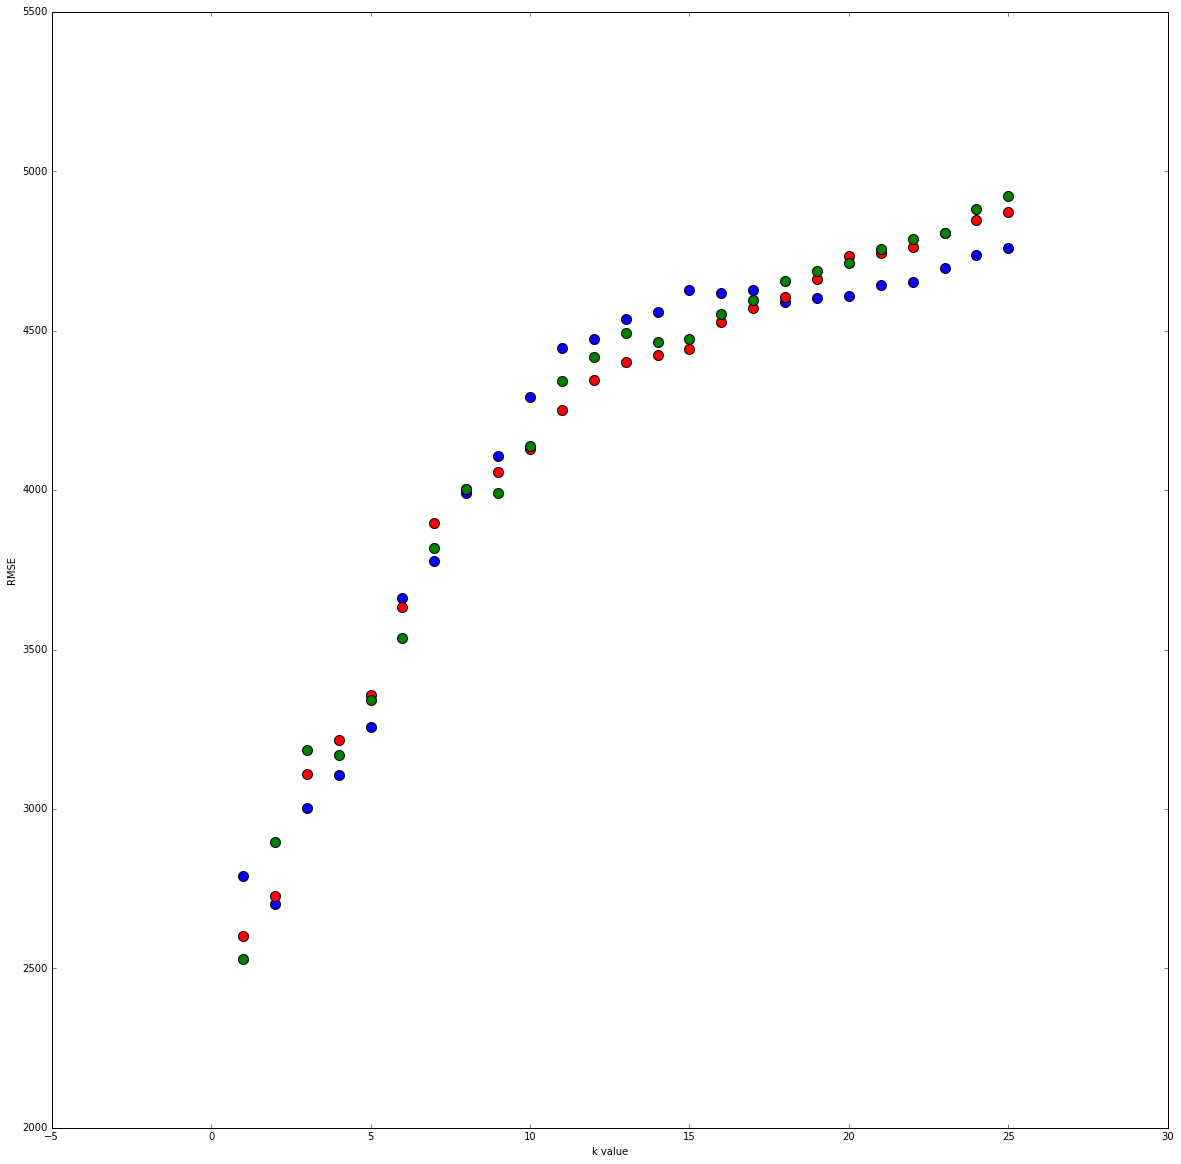

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize= (20,20))
x = []
y = []
for k,v in two_best.items():
    x.append(k)
    y.append(v)
    
plt.scatter(x,y,c = 'b', s= 100)
plt.xlabel('k value')
plt.ylabel('RMSE')

x = []
y = []
for k,v in four_best.items():
    x.append(k)
    y.append(v)
    
plt.scatter(x,y, c = 'r', s = 100)


x = []
y = []
for k,v in five_best.items():
    x.append(k)
    y.append(v)
    
plt.scatter(x,y, c = 'g', s = 100)






In [177]:
x = []
y = []
for k,v in two_best.items():
    x.append(k)
    y.append(v)

[4760.49488106037]